# STAT 345 Prelim Exam One

## Available Wednesday, February 19 at 8am Eastern Standard Time

## Due Friday, February 21 by 9:15am Eastern Standard Time

## Name: David Millard

You have 49.25 hours to do this exam, but it should only take $\lesssim$2 hours. You may use any books or notes you like, and any electronic devices with communication capabilities
switched off (airplane mode).  You may find it useful to use the wrapper [wilcoxdists.py](wilcoxdists.py) as well as the functionality of the Jupyter notebook.  You should not communicate with anyone or look anything up on the internet from the time you start the exam to the time you submit it.

Some problems contain boxes ($\boxed{\color{brown}{????}}$) into which you should place your final
answer. Express all numerical results to at least three decimal places.

The exam contains three problems worth a total of 50 points. Try not to
spend too much time on any one problem. The weight of each part of each
problem is listed, as is the total weight for each problem. Later parts
of a problem may or may not depend on some, but not all, of the previous
parts.

**Show your work!**

Fill in your solutions in the notebook below, inserting markdown and/or code cells as needed.  Try to do reasonably well with the typesetting, but don't feel compelled to replicate my formatting exactly.  **You do NOT need to make random variables blue!**

In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['font.size'] = 14

## 1. Election Polling (13 points total)

A ballot initiative requires a 60% supermajority to pass. A
polling firm conducts a straw poll of 80 voters (assumed to be a
representative sample of the electorate), to determine whether the
initiative is likely to pass.

**(a)** \[4pts\] If they wish to construct a test of significance
    $\alpha\le 0.05$, what threshold should they use?  

In [18]:
n = 80
p = 0.6
a = 0.05

thresh = stats.binom(n, p).isf(0.05); thresh

55.0

$$
\hbox{The initiative is likely to pass if more than}\quad\boxed{\color{brown}{55.0}}\quad\hbox{respondents plan to vote for it.}
$$

**(b)** \[5pts\] Construct and plot the power curve for the test in part (a), for actual support in the electorate at large between 60% and 100%.

In [23]:
theta_t = np.linspace(0.0,1.0,121)
ptheta_t = stats.norm(loc=theta_t).sf(0)
gammas_t = stats.binom(n,ptheta_t).sf(thresh-1)

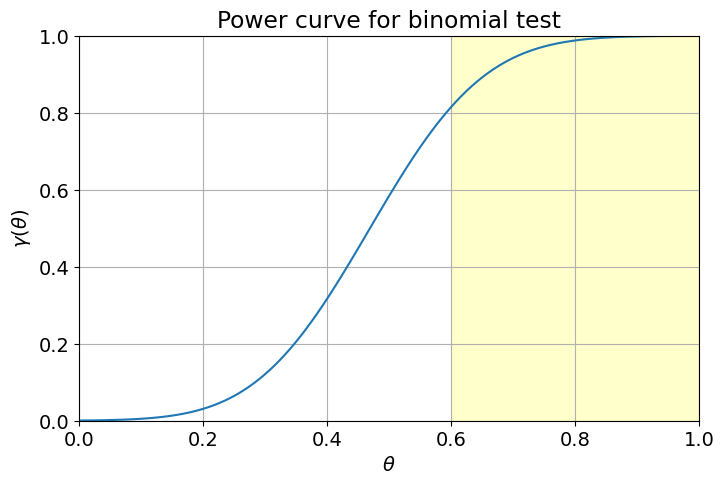

In [24]:
plt.plot(theta_t,gammas_t);
plt.axvspan(0.6, 1.0, alpha=0.2, color='yellow')
plt.xlim(0.0,1);
plt.ylim(0,1);
plt.xlabel(r'$\theta$');
plt.ylabel(r'$\gamma(\theta$)');
plt.title(r'Power curve for binomial test');
plt.grid();

**(c)** \[4pts\] If the results of the poll are that 60 of the respondents are
    in favor of the initiative, what is the $p$-value?

In [6]:
pval = stats.binom(n, p).sf(60-1); pval

0.0035612985974640913

$$\hbox{$p$-value} = \boxed{\color{brown}{0.00356}}$$

## 2. Sign Test and Median Confidence Interval (17 points total)

Consider a sample of size $n=10$ drawn from a continuous distribution.

**(a)** \[2pts\] If we construct the one-sample sign test for a hypothesized median value, what are the minimum and maximum possible values of the test statistic ${\color{royalblue}{N_{+}}}$?

In [7]:
n = 10
p  = 0.5

mydist = stats.binom(n, p)

$$\hbox{Minimum possible $n_+$} = \boxed{\color{brown}{0}}$$

$$\hbox{Maximum possible $n_+$} = \boxed{\color{brown}{10}}$$

**(b)** \[2pts\] What is the median of the distribution of ${\color{royalblue}{N_{+}}}$, assuming the null hypothesis?

In [8]:
median = mydist.ppf(0.5); median

5.0

$$\boxed{\color{brown}{5.0}}$$

**(c)** \[4pts\] Again assuming the null hypothesis, find a value $n_\ell$ such that $P({\color{royalblue}{N_{+}}}\mathbin{\le} n_\ell)$ is between $0.05$ and $0.055$, and calculate the actual value of $P({\color{royalblue}{N_{+}}}\mathbin{\le} n_\ell)$.

In [9]:
mydist.ppf(0.05), mydist.ppf(0.055)

(2.0, 3.0)

In [10]:
mydist.cdf(2)

0.0546875

$$P({\color{royalblue}{N_{+}}}\mathbin{\le} \boxed{\color{brown}{2}}) = \boxed{\color{brown}{0.0546}}$$

**(d)** \[3pts\] Again assuming the null hypothesis, find a value $n_u$ such that $P({\color{royalblue}{N_{+}}}\mathbin{\ge} n_u)$ is between $0.05$ and $0.055$, and calculate the actual value of $P({\color{royalblue}{N_{+}}}\mathbin{\ge} n_u)$.

In [11]:
mydist.isf(0.055), mydist.isf(0.05)

(7.0, 8.0)

In [12]:
mydist.sf(7.0)

0.0546875

$$P({\color{royalblue}{N_{+}}}\mathbin{\ge} \boxed{\color{brown}{7.0}}) = \boxed{\color{brown}{0.0546}}$$

**(e)** \[2pts\] Construct and display the order statistics of the following dataset:

In [13]:
d_i = np.array([25.5, 38.3, 33.4, 43.6, 43.4, 28.5, 28.6, 44.3, 52.8, 47.5])

In [14]:
ordered = np.sort(d_i); ordered

array([25.5, 28.5, 28.6, 33.4, 38.3, 43.4, 43.6, 44.3, 47.5, 52.8])

**(f)** \[4pts\] Use the results of parts (a)-(d) to construct a nonparametric confidence interval on the median of the population from which the data in part (e) were drawn, with a confidence level between 89% and 90%, and state the actual confidence level.

In [15]:
nl = 2; ng = 7

CI = ordered[nl:ng+1]; CI

array([28.6, 33.4, 38.3, 43.4, 43.6, 44.3])

$$\hbox{from}\quad\boxed{\color{brown}{28.6}}\quad\hbox{to}\quad\boxed{\color{brown}{44.3}}$$

In [16]:
clevel = 1 - (mydist.cdf(2) + mydist.sf(7)); clevel

0.890625

$$\hbox{Confidence Level}=\boxed{\color{brown}{0.890625}}$$

## 3. Signed Rank Test and Median Confidence Interval (20 points total)

In [17]:
from wilcoxondists import signrankpmf, signrankcdf, signrankppf

Consider a sample of size $n=10$.

**(a)** \[2pts\] If we construct the one-sample signed rank test for a hypothesized median value, what are the minimum and maximum possible values of the test statistic ${\color{royalblue}{T^{+}}}$ (the sum of the ranks of the positive differences)?

In [18]:
n = 10

np.arange(1, 10+1).sum() 

55

$$\hbox{Minimum possible $t^+$} = \boxed{\color{brown}{0}}$$

$$\hbox{Maximum possible $t^+$} = \boxed{\color{brown}{55}}$$

**(b)** \[2pts\] What is the median of the distribution of ${\color{royalblue}{T^{+}}}$, assuming the null hypothesis?

In [19]:
signrankppf(0.5, n)

27

$$\boxed{\color{brown}{27}}$$

**(c)** \[3pts\] Again assuming the null hypothesis, find a value $t_\ell$ such that $P({\color{royalblue}{T^{+}}}\mathbin{\le} t_\ell)$ is between $0.05$ and $0.055$, and calculate the actual value of $P({\color{royalblue}{T^{+}}}\mathbin{\le} t_\ell)$.

In [20]:
signrankppf(0.05, n), signrankppf(0.055, n)

(11, 12)

In [21]:
signrankcdf(11, n)

0.052734375

$$P({\color{royalblue}{T^{+}}}\mathbin{\le} \boxed{\color{brown}{11}}) = \boxed{\color{brown}{0.0527}}$$

**(d)** \[2pts\] Again assuming the null hypothesis, find a value $t_u$ such that $P({\color{royalblue}{T^{+}}}\mathbin{\ge} t_u)$ is between $0.05$ and $0.055$, and calculate the actual value of $P({\color{royalblue}{T^{+}}}\mathbin{\ge} t_u)$.

In [22]:
signrankppf(1-0.05, n), signrankppf(1-0.055, n)

(44, 43)

In [23]:
1-signrankcdf(43, n)

0.052734375

$$P({\color{royalblue}{T^{+}}}\mathbin{\ge} \boxed{\color{brown}{43}}) = \boxed{\color{brown}{0.05273437}}$$

**(e)** \[3pts\] For the following the following dataset, construct and sort the list of averages $\{\frac{d_i+d_j}{2}\}$ where $j\ge i$, and display the sorted list.

In [24]:
d_i = np.array([25.5, 28.5, 28.6, 33.4, 38.3, 43.4, 43.6, 44.3, 47.5, 52.8])

In [25]:
avgs = []

for i in range(len(d_i)):
    for j in range(i, len(d_i)):
        tmp = (d_i[i] + d_i[j]) / 2
        avgs.append(tmp)
        
avgs = np.array(avgs) 
sorted_avgs = np.sort(avgs); sorted_avgs

array([25.5 , 27.  , 27.05, 28.5 , 28.55, 28.6 , 29.45, 30.95, 31.  ,
       31.9 , 33.4 , 33.4 , 33.45, 34.45, 34.55, 34.9 , 35.85, 35.95,
       36.  , 36.05, 36.1 , 36.4 , 36.45, 36.5 , 38.  , 38.05, 38.3 ,
       38.4 , 38.5 , 38.85, 39.15, 40.45, 40.65, 40.7 , 40.85, 40.95,
       41.3 , 42.9 , 43.1 , 43.4 , 43.5 , 43.6 , 43.85, 43.95, 44.3 ,
       45.45, 45.55, 45.55, 45.9 , 47.5 , 48.1 , 48.2 , 48.55, 50.15,
       52.8 ])

**(f)** \[4pts\] Use the results of parts (a)-(d) to construct a nonparametric confidence interval on the median of the population from which the data in part (e) were drawn, with a confidence level between 89% and 90%, and state the actual confidence level.

In [26]:
nl = 11; ng = 43

CI = sorted_avgs[nl:ng+1]; CI

array([33.4 , 33.45, 34.45, 34.55, 34.9 , 35.85, 35.95, 36.  , 36.05,
       36.1 , 36.4 , 36.45, 36.5 , 38.  , 38.05, 38.3 , 38.4 , 38.5 ,
       38.85, 39.15, 40.45, 40.65, 40.7 , 40.85, 40.95, 41.3 , 42.9 ,
       43.1 , 43.4 , 43.5 , 43.6 , 43.85, 43.95])

$$\hbox{from}\quad\boxed{\color{brown}{33.4}}\quad\hbox{to}\quad\boxed{\color{brown}{43.95}}$$

In [27]:
1 - (signrankcdf(11, n) + (1-signrankcdf(43, n)))

0.89453125

$$\hbox{Confidence Level}=\boxed{\color{brown}{0.89453}}$$

**(g)** \[2pts\] What additional assumption is made about the distribution, compared to the confidence interval in problem 2, part (f)?

The sign rank test assumes a symmetric distribution.

**(h)** \[2pts\] Considering what you learned on the homework about the power of the hypothesis tests referenced in these two problems, how do you expect the typical widths of the confidence intervals, constructed at the same confidence level using the constructions of problem 2 and problem 3, to compare?  Specificially, which do you expect to be narrower, and why, in each of these cases:

**i)** For samples drawn from a normal distribution?

When the instance is drawn from a normal distribution, the CI of wilcoxon sign rank test will be narrower. On homework 4.2 we saw when samples are drawn from a normal distribution, the power curve of the wilcoxon sign rank test is larger than that of the sign test. A larger power corresponds to a narrower CI because power indicates the strength of our test. A stronger test indicates much narrower bounds because of the increased confidence.

**ii)** For samples drawn from a heavy-tailed distribution like the Laplace distribution?

When the instance is drawn from the laplace distribution, the CI of the sign test will be narrower. Again, on homework 4.2 we saw when samples are drawn from the laplace distribution, the power curve of the sign test was slightly larger than the wilcoxon sign rank test. Again the same reasoning is applied here. For the Laplace distribution, the sign test has slightly better power than the wilcoxon sign rank test because the sign test is less affected by extreme values (due to the heavy tails).